### 0. 사용할 패키지 불러오기

In [32]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten

width = 28
height = 28

### 1. 데이터셋 생성하기

In [37]:
# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width, height, 1).astype('float32') / 255.0
x_test = x_test.reshape(10000, width, height, 1).astype('float32') / 255.0

# 훈련셋과 검증셋 분리
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

# 데이터셋 전처리 : 홀수는 1, 짝수는 0으로 변환
y_train = y_train % 2
y_val = y_val % 2
y_test = y_test % 2 

### 2. 모델 구성하기

In [38]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 257       
Total para

### 3. 모델 학습과정 설정하기

In [40]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

### 4. 모델 학습시키기

In [41]:
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 11s 224us/step - loss: 0.3411 - acc: 0.8567 - val_loss: 0.1548 - val_acc: 0.9480
Epoch 2/30
50000/50000 [==============================] - 7s 146us/step - loss: 0.1355 - acc: 0.9510 - val_loss: 0.0899 - val_acc: 0.9695
Epoch 3/30
50000/50000 [==============================] - 7s 148us/step - loss: 0.0899 - acc: 0.9685 - val_loss: 0.0658 - val_acc: 0.9756
Epoch 4/30
50000/50000 [==============================] - 8s 151us/step - loss: 0.0700 - acc: 0.9756 - val_loss: 0.0851 - val_acc: 0.9685
Epoch 5/30
50000/50000 [==============================] - 7s 150us/step - loss: 0.0595 - acc: 0.9794 - val_loss: 0.0616 - val_acc: 0.9769
Epoch 6/30
50000/50000 [==============================] - 8s 158us/step - loss: 0.0525 - acc: 0.9819 - val_loss: 0.0461 - val_acc: 0.9846
Epoch 7/30
50000/50000 [==============================] - 7s 146us/step - loss: 0.0472 - acc: 0.9836 - val_loss: 0.0409 -

### 5. 학습과정 살펴보기

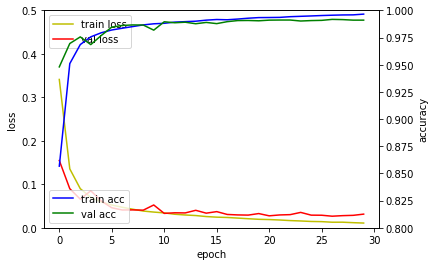

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 0.5])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.8, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

### 6. 모델 평가하기

In [43]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and metrics ##')
print(loss_and_metrics)

10000/10000 [==============================] - 1s 56us/step
## evaluation loss and metrics ##
[0.022739575760916342, 0.993]


### 7. 모델 사용하기

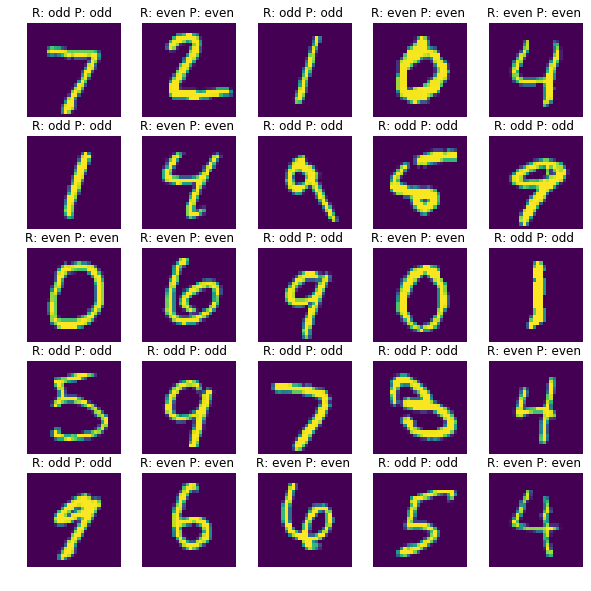

In [45]:
yhat_test = model.predict(x_test, batch_size=32)

%matplotlib inline
import matplotlib.pyplot as plt

plt_row = 5
plt_col = 5
plt.rcParams["figure.figsize"] = (10, 10)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[i//plt_row, i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    
    sub_plt_title = 'R: '
    
    if y_test[i] :
        sub_plt_title += 'odd '
    else:
        sub_plt_title += 'even '
    
    sub_plt_title += 'P: '
    
    if yhat_test[i] >= 0.5 :
        sub_plt_title += 'odd '
    else:
        sub_plt_title += 'even '
    
    sub_plt.set_title(sub_plt_title)
    
plt.show()